In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
image_root_dir_path = "../input/imgs/brown_result"
image_file_path = image_root_dir_path + "/5/1100292179.jpg"

In [8]:
import cv2

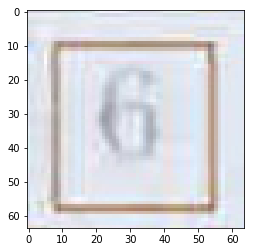

In [34]:
image_file_path = "../input/imgs/jupyter/6.jpg"
src = cv2.imread(image_file_path, 1)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)

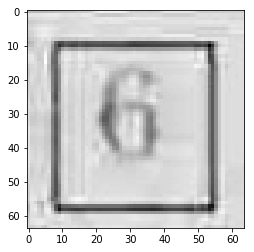

In [52]:
# グレースケール変換
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
# 線形濃度変換
gamma = 2.0
    
    # 画素値の最大値
imax = gray.max() 
    
    # ガンマ補正
gray = imax * (gray / imax)**(1/gamma)
plt.gray()
plt.imshow(gray)

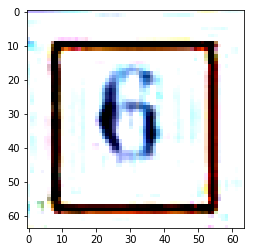

In [59]:
min_table = 180
max_table = 220
diff_table = max_table - min_table
look_up_table = np.arange(256, dtype = 'uint8' )
 
for i in range(0, min_table):
 
    look_up_table[i] = 0
 
for i in range(min_table, max_table):
 
    look_up_table[i] = 255 * (i - min_table) / diff_table
 
for i in range(max_table, 255):
 
    look_up_table[i] = 255
con = cv2.LUT(src, look_up_table)
plt.imshow(con)

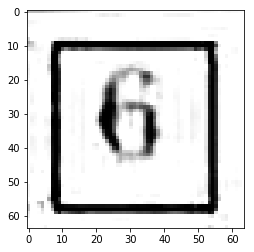

In [61]:
con_g = cv2.cvtColor(con, cv2.COLOR_RGB2GRAY)
plt.imshow(con_g)

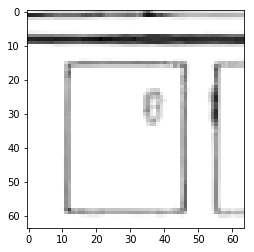

In [33]:
img = im_utils.resize_with_aspect(src,  height=128)
plt.imshow(img)

NameError: name 'im_utils' is not defined

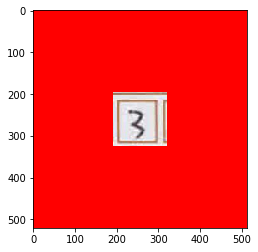

In [8]:
desired_size = (521,512)
img_size = img.shape
delta_w = desired_size[1] - img_size[1]
delta_h = desired_size[0] - img_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

color = [255, 0, 0]
new_im = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)
plt.imshow(new_im)

In [9]:
def resize_with_padding(src, dst_size, padding_color=[255,255,255]):
    src_w = src.shape[1]
    src_h = src.shape[0]
    dst_w, dst_h = dst_size
    if src_w > dst_w or src_h > dst_h:
        src = im_utils.resize_with_aspect(src, width=dst_w,  height=dst_h)
    src_w = src.shape[1]
    src_h = src.shape[0]
    delta_w = dst_w  - src_w
    delta_h = dst_h - src_h
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    dst = cv2.copyMakeBorder(src, top, bottom, left, right, cv2.BORDER_CONSTANT, value=padding_color)
    return dst

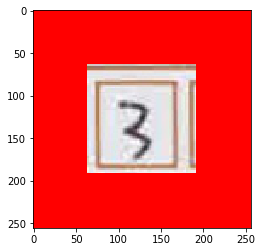

In [11]:
plt.imshow(im_utils.resize_with_padding(img, (256, 256), padding_color=[255]))

In [52]:
img_W, img_H, img_C = 2,2,3
header = "path, label,"
for i in range(img_W * img_H):
    if img_C == 1:
        pixel_str = "pixel" + str(i)
    elif img_C == 3:
        pixel_str = "pixel" + str(i) + "_r," + "pixel" + str(i) + "_g," + "pixel" + str(i) + "_b,"
        header = header + (pixel_str)

In [53]:
header = header.split(',')[:-1]
header[-1]

'pixel3_b'

In [54]:
header_list = header
for i, col_name in enumerate(header_list[2:]):
    print(col_name, i)

pixel0_r 0
pixel0_g 1
pixel0_b 2
pixel1_r 3
pixel1_g 4
pixel1_b 5
pixel2_r 6
pixel2_g 7
pixel2_b 8
pixel3_r 9
pixel3_g 10
pixel3_b 11


In [81]:
import os_utils
import pandas as pd
def image_pd_dataset_from_dir(img_dir_path, input_shape, ext, th_value = None):
    '''create image dataset with label from directory
    '''
    img_W, img_H, img_C = input_shape
    y_list = []
    x_list = []
    p_list = []
    # read category
    for dir_name in os_utils.get_dir_name_list(img_dir_path):
        dir_path = os.path.join(img_dir_path, dir_name)
        # read image
        for img_path in os_utils.get_file_path_list(dir_path, ext):
            p_list.append(img_path)
            # read image data
            if img_C == 1:
                img = cv2.imread(img_path, 0)
                if th_value is not None:
                    _,img = cv2.threshold(img,th_value,255,cv2.THRESH_BINARY)
            elif img_C == 3:
                img = cv2.imread(img_path, 1)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            else:
                assert False, "<create_dataset> Invalid img_C value! {}".format(img_C)
            img = cv2.resize(img, (img_W, img_H))
            # create record
            y_list.append(int(dir_name))
            x_list.append(img.flatten())
    X = np.array(x_list).reshape(-1, (img_W*img_H*img_C))
    
    header = "path, label,"
    for i in range(img_W * img_H):
        if img_C == 1:
            pixel_str = "pixel" + str(i)
        elif img_C == 3:
            pixel_str = "pixel" + str(i) + "_r," + "pixel" + str(i) + "_g," + "pixel" + str(i) + "_b,"
            header = header + (pixel_str)
    header_list = header.split(',')[:-1]

    row_list = []
    for i in range(X.shape[0]):
        row = list(X[i,:])
        row.insert(0, p_list[i])
        row.insert(1, y_list[i])
        row_list.append(row)

    df = pd.DataFrame(row_list, columns=header_list)

    return df

In [82]:
%pwd

'/Volumes/deepstation/dev/utils/skyz_pyutils/skz_utils'

In [83]:
img_dir_path = "../input/imgs/brown_result"
df = image_pd_dataset_from_dir(img_dir_path, (64,64,3), 'jpg')
df.to_csv("data.csv")

(1184, 12288)
(1184, 12290)


In [62]:
mac_jupyter_root_dir_path = "/Volumes/deepstation/jupyter"

In [63]:
ovoc_sample_dir_path = mac_jupyter_root_dir_path + "/voc_sample"

In [64]:
voc_sample_xml_file_path = voc_sample_dir_path + "/2007_000032.xml"

In [65]:
voc_sample_img_file_path = voc_sample_dir_path + "/2007_000032.jpg"

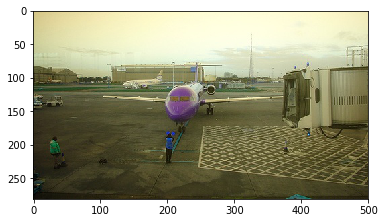

In [66]:
img = cv2.imread(voc_sample_img_file_path)
plt.imshow(img)

In [11]:
import jup_def

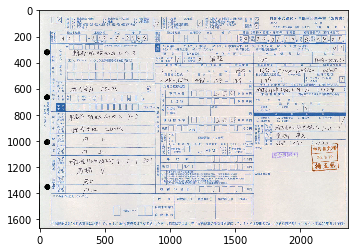

In [12]:
img = cv2.imread(jup_def.chouhyou_file_path)
plt.imshow(img)

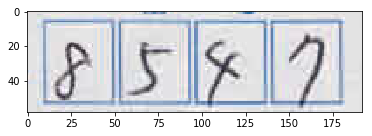

In [13]:
car_no = img[182:240, 650:842]
plt.imshow(car_no)

In [71]:
car_no.shape

(58, 192, 3)

In [14]:
from im_utils import sliding_window
from im_utils import pyramid

(winW, winH) = (128, 128)

# loop over the image pyramid
for resized in pyramid(image, scale=1.5):
	# loop over the sliding window for each layer of the pyramid
	for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
		# if the window does not meet our desired window size, ignore it
		if window.shape[0] != winH or window.shape[1] != winW:
			continue

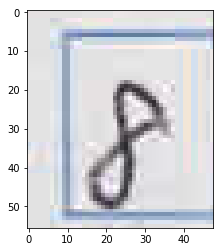

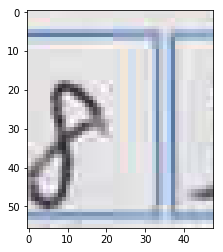

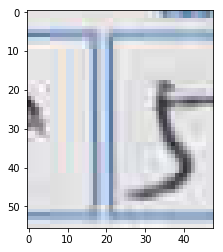

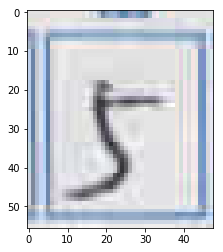

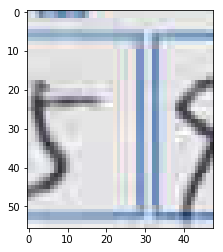

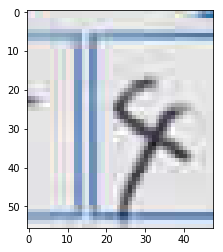

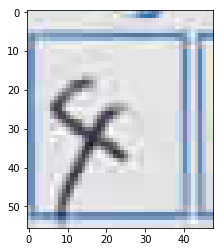

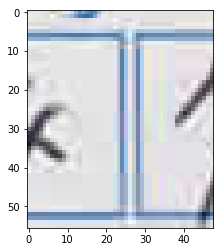

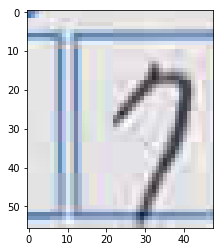

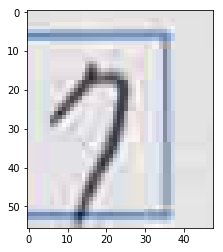

In [29]:
(winW, winH) = (48, 56)
for resized in pyramid(car_no, scale=3):
    for (x, y, window) in sliding_window(resized, stepSize=16, windowSize=(winW, winH)):
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
        plt.imshow(window)
        plt.show()

In [30]:
cv2.saliency

<module 'cv2.saliency'>

In [40]:
image = src
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")

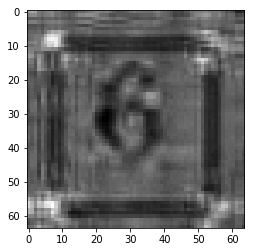

In [42]:
plt.gray()
plt.imshow(saliencyMap)